In [1]:
import pandas as pd

Importamos las librerias necesarias para trabajar, después comenzamos por importar nuestro CSV

In [2]:
df = pd.read_csv("data.csv")

Una costumbre útil para trabajar con pandas y CSV es definir las series con las que se van a trabajar desde un principio

In [3]:
edad = df["age"]
altura = df["height"]
genero = df["gender"]
colesterol = df["cholesterol"]

Después podemos comenzar a revicar los datos que vamos a utilizar, en este caso podemos hacer el siguiente comando para ver la descripción de las alturas según los géneros, en el caso del género 1:


In [20]:
altura[genero == 1].describe()

count    45530.000000
mean       161.355612
std          7.052726
min         55.000000
25%        157.000000
50%        161.000000
75%        166.000000
max        250.000000
Name: height, dtype: float64

Y con el género 2:

In [5]:
altura[genero == 2].describe()

count    24470.000000
mean       169.947895
std          7.228895
min         65.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        207.000000
Name: height, dtype: float64

In [ ]:
Y así es como se pueden hacer distintos análisis sobre los datos, tales como

In [8]:
altura.mean()

164.35922857142856

In [9]:
altura.std()

8.210126364538139

In [10]:
altura.max()

250

In [11]:
altura.mean()

164.35922857142856

In [21]:
altura[genero == 1][colesterol == 3].mean()

160.33453302141444

Otra de las cosas más importantes al momento de analizar datos es poder graficar estos, para ello generalmente se usa la librería Matplotlib

In [ ]:
import matplotlib as plt

Y armamos nuestro código para el gráfico, en este caso haremos un gráfico de caja para analizar la distribución de las altura

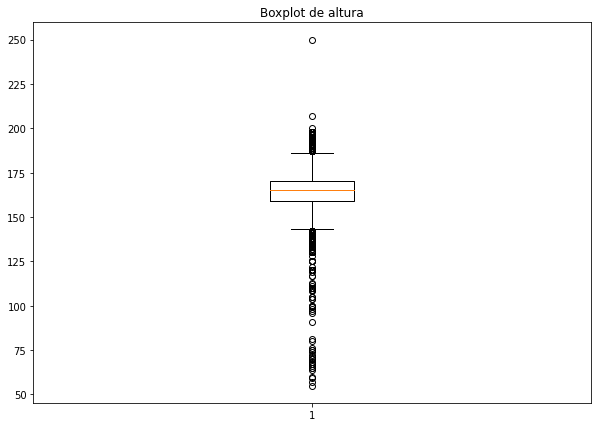

In [23]:
fig1 = plt.figure(figsize =(10, 7)) #Define el tamaño de mi gráfico
plt.boxplot(altura) #Defino que quiero hacer un boxplot de la altura
plt.title("Boxplot de altura") #le pongo título a mi Gráfico
plt.show() #Muestro mi gráfico


Y así puedo ir complejizando más

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


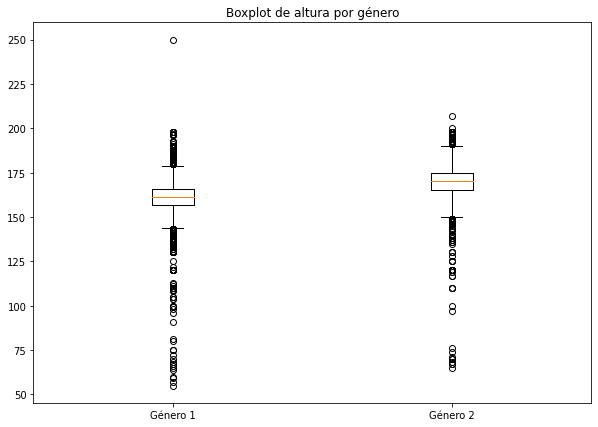

In [25]:
fig2 = plt.figure(figsize =(10, 7))
plt.boxplot([altura[genero == 1], altura[genero == 2]]) #Separo las alturas por hombre y mujer, y las añado al plot
plt.title("Boxplot de altura por género")
plt.xticks([1, 2], ['Género 1', 'Género 2'])#Le cambio los Ticks (nombres) a el eje x
plt.show()

Y se puede complejizar MÁS aún

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


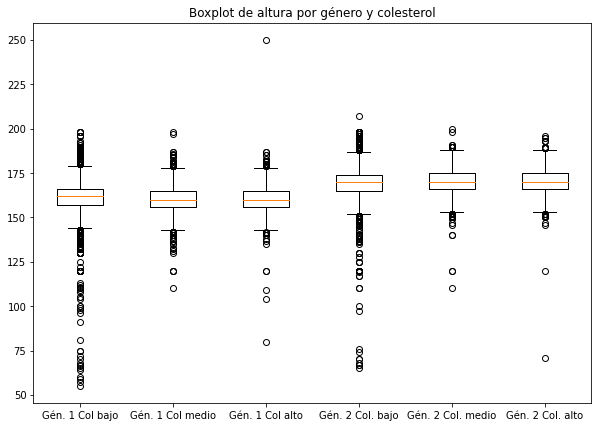

In [15]:
fig2 = plt.figure(figsize =(10, 7))
plt.boxplot([altura[genero == 1][colesterol == 1], altura[genero == 1][colesterol == 2], altura[genero == 1][colesterol == 3], altura[genero == 2][colesterol == 1], altura[genero == 2][colesterol == 2], altura[genero == 2][colesterol == 3]])
plt.title("Boxplot de altura por género y colesterol")
plt.xticks([1, 2, 3, 4 , 5, 6], ['Gén. 1 Col bajo', 'Gén. 1 Col medio', 'Gén. 1 Col alto', 'Gén. 2 Col. bajo', 'Gén. 2 Col. medio','Gén. 2 Col. alto'])
plt.show() #Gráfico que distingue por colesterol y género

Ahora vamos a utilizar el comando Groupby, que sirve para agrupar datos según la necesidad (hicimos algo parecido en el último gráfico, pero esto ahorra código, y si se utiliza bien puede ser mucho más potente)

In [28]:
df.groupby(colesterol)["height"].describe() #Entre paréntesis va la variable categórica por la cual quiero separar los datos, y después entre corchetes la variable numérica (puede ser categórica tb) que quiero analizar

,count,mean,std,min,25%,50%,75%,max
cholesterol,,,,,,,,
1,52385.0,164.590283,8.174264,55.0,159.0,165.0,170.0,207.0
2,9549.0,163.880406,8.276570,110.0,158.0,164.0,169.0,200.0
3,8066.0,163.425490,8.273590,71.0,158.0,163.0,169.0,250.0


Y todo esto se puede ir mezclando

In [17]:
df.groupby(genero)["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,45530.0,72.565605,14.238838,21.0,63.0,70.0,80.0,200.0
2,24470.0,77.257307,14.187636,10.0,68.0,75.0,85.0,200.0


In [18]:
df.groupby(["gender", "cholesterol"]).size()

gender  cholesterol
1       1              33570
        2               6403
        3               5557
2       1              18815
        2               3146
        3               2509
dtype: int64